In [1]:
# -*- coding: utf-8 -*-
# @Time : 2024/3/23 下午4:57
# @Author : nanji
# @Site :
# @File : solve01.py
# @Software: PyCharm 
# @Comment : https://www.kaggle.com/code/getanmolgupta01/defect-pred-eda-xgboost-lgbm-catboost
'''

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
'''

"\n\n# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python\n# For example, here's several helpful packages to load\n"

In [2]:

import numpy as np  # linear algebra
import pandas as pd  # input processing, CSV file I/O (e.g. pd.read_csv)

# Input input files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [3]:
import os
# for dirname, _, filenames in os.walk('../input/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [4]:
# Libray for Data Manipulation.
import pandas as pd
import numpy as np

# Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", font_scale=1.5)
sns.set(rc={"axes.facecolor": "#FFFAF0", "figure.facecolor": "#FFFAF0"})
sns.set_context("poster", font_scale=.7)

In [5]:
import warnings

warnings.filterwarnings('ignore')

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency


In [6]:

# Library to Display whole Dataset.
pd.set_option("display.max.columns", 100)

train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [7]:
print(train_df.shape)
print(test_df.shape)
print(train_df.columns)

print("1" * 100)
print(train_df.info())

(19219, 35)
(12814, 28)
Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   

In [8]:
# Identify the input types of columns
column_data_types = train_df.dtypes
# print("2"*100)
print(column_data_types)

id                         int64
X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                     int64
Z_Scratch                  int64
K_Scatch  

In [9]:

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
	if np.issubdtype(data_type, np.number):
		numerical_count += 1
	else:
		categorical_count += 1

In [10]:
print(numerical_count)
print(categorical_count)

35
0


In [11]:

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")


There are 35 Numerical Columns in dataset
There are 0 Categorical Columns in dataset


In [12]:

# 5. Checking if There's Any Duplicate Records.¶
print("Duplicates in Dataset: ", train_df.duplicated().sum())


Duplicates in Dataset:  0


In [13]:

# There are no duplicate records present in the dataset.
# 6. Computing Total No. of Missing Values and the Percentage of Missing Values¶
missing_data = train_df.isnull().sum().to_frame().rename(
	columns={0: "Total No. of Missing Values"}
)
missing_data['% of Missing Values'] = round((
													missing_data['Total No. of Missing Values'] / len(train_df)) * 100,
											2)


In [14]:
print(missing_data)
# None of the Attribute are having Missing Values.

                       Total No. of Missing Values  % of Missing Values
id                                               0                  0.0
X_Minimum                                        0                  0.0
X_Maximum                                        0                  0.0
Y_Minimum                                        0                  0.0
Y_Maximum                                        0                  0.0
Pixels_Areas                                     0                  0.0
X_Perimeter                                      0                  0.0
Y_Perimeter                                      0                  0.0
Sum_of_Luminosity                                0                  0.0
Minimum_of_Luminosity                            0                  0.0
Maximum_of_Luminosity                            0                  0.0
Length_of_Conveyer                               0                  0.0
TypeOfSteel_A300                                 0              

In [15]:
print(round(test_df.describe().T, 2))

                         count        mean         std       min        25%  \
id                     12814.0    25625.50     3699.23  19219.00   22422.25   
X_Minimum              12814.0      709.33      531.88      0.00      46.00   
X_Maximum              12814.0      753.27      500.74      4.00     214.00   
Y_Minimum              12814.0  1846533.46  1916427.39   6712.00  640173.75   
Y_Maximum              12814.0  1842029.49  1911425.61   6724.00  639857.00   
Pixels_Areas           12814.0     1672.91     3725.52      4.00      91.00   
X_Perimeter            12814.0       96.46      219.93      2.00      15.00   
Y_Perimeter            12814.0       64.73      188.51      2.00      14.00   
Sum_of_Luminosity      12814.0   192689.30   481287.15    535.00    9968.00   
Minimum_of_Luminosity  12814.0       84.55       28.71      0.00      68.00   
Maximum_of_Luminosity  12814.0      128.69       14.28     37.00     124.00   
Length_of_Conveyer     12814.0     1460.14      146.

In [16]:
cols = ["id"]
train_df.drop(columns=cols, inplace=True)
test_df.drop(columns=cols, inplace=True)
# creating a 'Fault_type column for EDA purpose '
train_df['Fault_Type'] = train_df[
	['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
] \
	.idxmax(axis=1)

In [17]:
cols

['id']

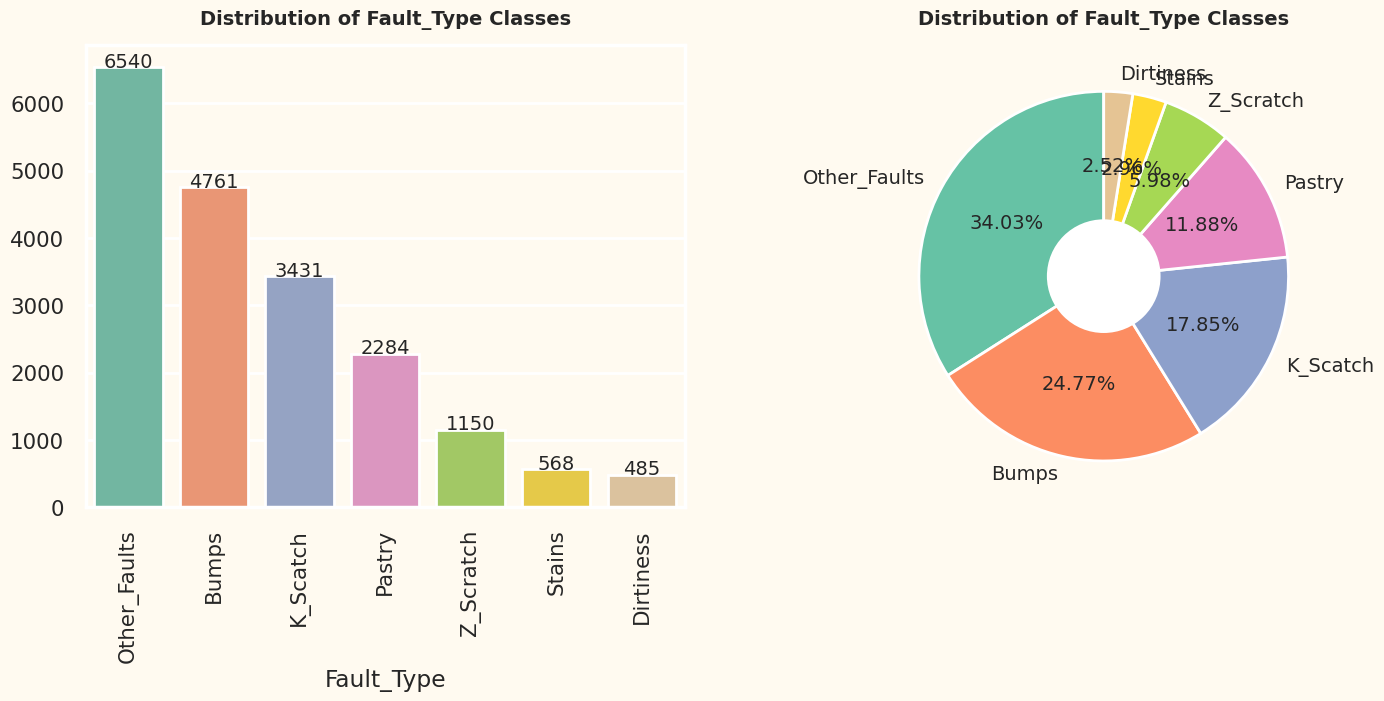

In [18]:
# 1. Visualizing the Distribution of each Fault_Type class¶
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
Fault_Type_counts = train_df["Fault_Type"].value_counts()

sns.barplot(x=Fault_Type_counts.index, y=Fault_Type_counts.values, palette='Set2')
plt.title("Distribution of Fault_Type Classes", fontweight="black", size=14, pad=15)
for i, v in enumerate(Fault_Type_counts.values):
    plt.text(i, v, v, ha="center", fontsize=14)

plt.xticks(rotation=90)
# Visualization to show distribution of Fault_Type classes in percentage

plt.subplot(1, 2, 2)
colors = sns.color_palette('Set2', len(Fault_Type_counts))
plt.pie(Fault_Type_counts, labels=Fault_Type_counts.index, autopct="%.2f%%", textprops={"size": 14},
        colors=colors, startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Distribution of Fault_Type Classes", fontweight="black", size=14, pad=15)
plt.show()


In [19]:
Fault_Type_counts.index

Index(['Other_Faults', 'Bumps', 'K_Scatch', 'Pastry', 'Z_Scratch', 'Stains',
       'Dirtiness'],
      dtype='object', name='Fault_Type')

In [20]:
Fault_Type_counts.values

array([6540, 4761, 3431, 2284, 1150,  568,  485])

In [21]:
#  Inference:
# Pastry have 11.88% distribution
# Z_Scratch have 5.98% distribution
# K_Scatch have 17.85% distribution
# Stains have 2.96% distribution
# Dirtiness have 2.52% distribution
# Bumps have 24.77% distribution
# Other_Faults have 34.03% distribution

# 2. Visualising the distribution of each features¶
numerical_features = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
					  'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity',
					  'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300',
					  'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index',
					  'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index',
					  'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index',
					  'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']

In [22]:

# # Set the figure size and arrange plots horizontally in pairs
# fig, axes = plt.subplots(nrows=(len(numerical_features) + 2) // 3, ncols=3, figsize=(30, 40))
# # Flatten the axes array for easy indexing
# axes = axes.flatten()


# # Loop through the selected columns and create histograms with density
# for i, col in enumerate(numerical_features):
#     sns.histplot(data=train_df, x=col, hue='Fault_Type', \
# 				 multiple="stack", bins=20, \
# 				 kde=True, palette='viridis',\
# 				 ax=axes[i])

#     axes[i].set_title(f'Histogram with Density for {col}')
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('Density')


# # Remove any empty subplots if the number of columns is odd
# if len(numerical_features) % 3 != 0:
#     for j in range(len(numerical_features) % 3, 3):
#         fig.delaxes(axes[-j - 1])

# plt.tight_layout()
# plt.show()

In [23]:
'''
From these plots we can make the following conclusions about the features' distributions:

Normal: Maximum_of_Luminosity, Empty_Index, Square_Index, and Luminosity_Index
Close to normal: Minimum_of_Luminosity, and Orientation_Index
Skewed to the right: Y_Minimum, Y_Maximum, Pixels_Areas, X_Perimeter, Y_Perimeter, and Sum_of_Luminosity
Close to skewed to the right: Log_Y_Index
Close to skewed to the left: Edges_X_Index
Close to uniform: X_Minimum, X_Maximum, EdgesIndex, Edges_Y_Index, and SigmoidOfAreas
The features not mentioned have distributions that we are unable to categorise.
We will later perform transformations on the features that fell into the categories: 
Close to normal, Skewed to the right, Close to skewed to the right, 
and Close to skewed to the left. 
We aim to transform the values in such a way that their distributions become more normal.¶
'''

"\nFrom these plots we can make the following conclusions about the features' distributions:\n\nNormal: Maximum_of_Luminosity, Empty_Index, Square_Index, and Luminosity_Index\nClose to normal: Minimum_of_Luminosity, and Orientation_Index\nSkewed to the right: Y_Minimum, Y_Maximum, Pixels_Areas, X_Perimeter, Y_Perimeter, and Sum_of_Luminosity\nClose to skewed to the right: Log_Y_Index\nClose to skewed to the left: Edges_X_Index\nClose to uniform: X_Minimum, X_Maximum, EdgesIndex, Edges_Y_Index, and SigmoidOfAreas\nThe features not mentioned have distributions that we are unable to categorise.\nWe will later perform transformations on the features that fell into the categories: \nClose to normal, Skewed to the right, Close to skewed to the right, \nand Close to skewed to the left. \nWe aim to transform the values in such a way that their distributions become more normal.¶\n"

In [24]:
def transform(X):
	eps = 1e-5
	X['Sum_of_Luminosity'] = np.log(X['Sum_of_Luminosity'] + eps)
	X['Pixels_Areas'] = np.log(X['Pixels_Areas'] + eps)
	X['X_Perimeter'] = np.log(X['X_Perimeter'] + eps)
	X['Steel_Plate_Thickness'] = np.log(X['Steel_Plate_Thickness'] + eps)
	X['Y_Perimeter'] = np.log(X['Y_Perimeter'] + eps)
	X['Outside_X_Index'] = np.log(X['Outside_X_Index'] + eps)
	X['Y_Minimum'] = np.log(X['Y_Minimum'] + eps)
	X['Y_Maximum'] = np.log(X['Y_Maximum'] + eps)
	return X


In [25]:
a = transform(train_df)
print(a.shape)

(19219, 35)


In [26]:
a = transform(test_df)
print(a.shape)

(12814, 27)


In [27]:
# Featutre Engineering and data preparation
df = train_df.copy()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [29]:

df = sm.add_constant(df.select_dtypes(include=[np.number]))
vif = pd.DataFrame()
vif["Variable"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

In [30]:
highly_correlated_variable=[]
for index,row in vif.iterrows():
    if row['VIF']>6.5:
        highly_correlated_variable.append(row['Variable'])
highly_correlated_variable.remove('const')
highly_correlated_variable

['X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Outside_X_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas']

In [31]:
import numpy as np

epsilon = 1e-5

def generate_features(X):
	# Location Features
	X['X_Distance'] = X['X_Maximum'] - X['X_Minimum']
	X['Y_Distance'] = X['Y_Maximum'] - X['Y_Minimum']
	# Density Feature
	# X['Density'] = X['Pixels_Areas'] / (X['X_Perimeter'] + X['Y_Perimeter'])
	# Relative Perimeter Feature
	X['Relative_Perimeter'] = X['X_Perimeter'] / (X['X_Perimeter'] + X['Y_Perimeter'] + epsilon)
	# Circularity Feature
	X['Circularity'] = X['Pixels_Areas'] / (X['X_Perimeter'] ** 2)
	# Symmetry Index Feature
	# X['Symmetry_Index'] = np.abs(X['X_Distance'] - X['Y_Distance']) / (X['X_Distance'] + X['Y_Distance'] + epsilon)
	# Color Contrast Feature
	X['Color_Contrast'] = X['Maximum_of_Luminosity'] - X['Minimum_of_Luminosity']
	# Combined Geometric Index Feature
	# X['Combined_Geometric_Index'] = X['Edges_Index'] * X['Square_Index']

	# Interaction Term Feature
	# X['X_Distance*Pixels_Areas'] = X['X_Distance'] * X['Pixels_Areas']

	# Additional Features
	# X['sin_orientation'] = np.sin(X['Orientation_Index'])
	# X['Edges_Index2'] = np.exp(X['Edges_Index'] + epsilon)
	# X['X_Maximum2'] = np.sin(X['X_Maximum'])
	# X['Y_Minimum2'] = np.sin(X['Y_Minimum'])
	# X['Aspect_Ratio_Pixels'] = np.where(X['Y_Perimeter'] == 0, 0, X['X_Perimeter'] / X['Y_Perimeter'])
	# X['Aspect_Ratio'] = np.where(X['Y_Distance'] == 0, 0, X['X_Distance'] / X['Y_Distance'])

	# Average Luminosity Feature
	# X['Average_Luminosity'] = (X['Sum_of_Luminosity'] + X['Minimum_of_Luminosity']) / 2

	# Normalized Steel Thickness Feature
	# X['Normalized_Steel_Thickness'] = (X['Steel_Plate_Thickness'] - X['Steel_Plate_Thickness'].min())
	# 				/ (X['Steel_Plate_Thickness'].max() - X['Steel_Plate_Thickness'].min())

	# Logarithmic Features
	# X['Log_Perimeter'] = np.log(X['X_Perimeter'] + X['Y_Perimeter'] + epsilon)
	# X['Log_Luminosity'] = np.log(X['Sum_of_Luminosity'] + epsilon)
	# X['Log_Aspect_Ratio'] = np.log(X['Aspect_Ratio'] ** 2 + epsilon)

	# Statistical Features
	X['Combined_Index'] = X['Orientation_Index'] * X['Orientation_Index']
	X['Sigmoid_Areas'] = 1 / (1 + np.exp(-X['LogOfAreas'] + epsilon))
	return X


In [32]:

# print('3'*100)
a=generate_features(train_df)
print(a.shape)
print('4'*100)
b=generate_features(test_df)
print(b.shape)


(19219, 42)
4444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444
(12814, 34)


In [33]:

train_df = train_df.drop(highly_correlated_variable, axis=1)
test_df = test_df.drop(highly_correlated_variable, axis=1)

In [34]:

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
train_df['Fault_Type'] = label.fit_transform(train_df[['Fault_Type']])
label_mapping = dict(zip(label.classes_, label.transform(label.classes_)))

In [35]:
print(label.classes_)
print(label_mapping)

['Bumps' 'Dirtiness' 'K_Scatch' 'Other_Faults' 'Pastry' 'Stains'
 'Z_Scratch']
{'Bumps': 0, 'Dirtiness': 1, 'K_Scatch': 2, 'Other_Faults': 3, 'Pastry': 4, 'Stains': 5, 'Z_Scratch': 6}


In [36]:

label = LabelEncoder()
train_df['Fault_Type'] = label.fit_transform(train_df['Fault_Type'])
label_mapping = dict(zip(label.classes_, label.transform(label.classes_)))
print('Label Mapping:')
print(label_mapping)

Label Mapping:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


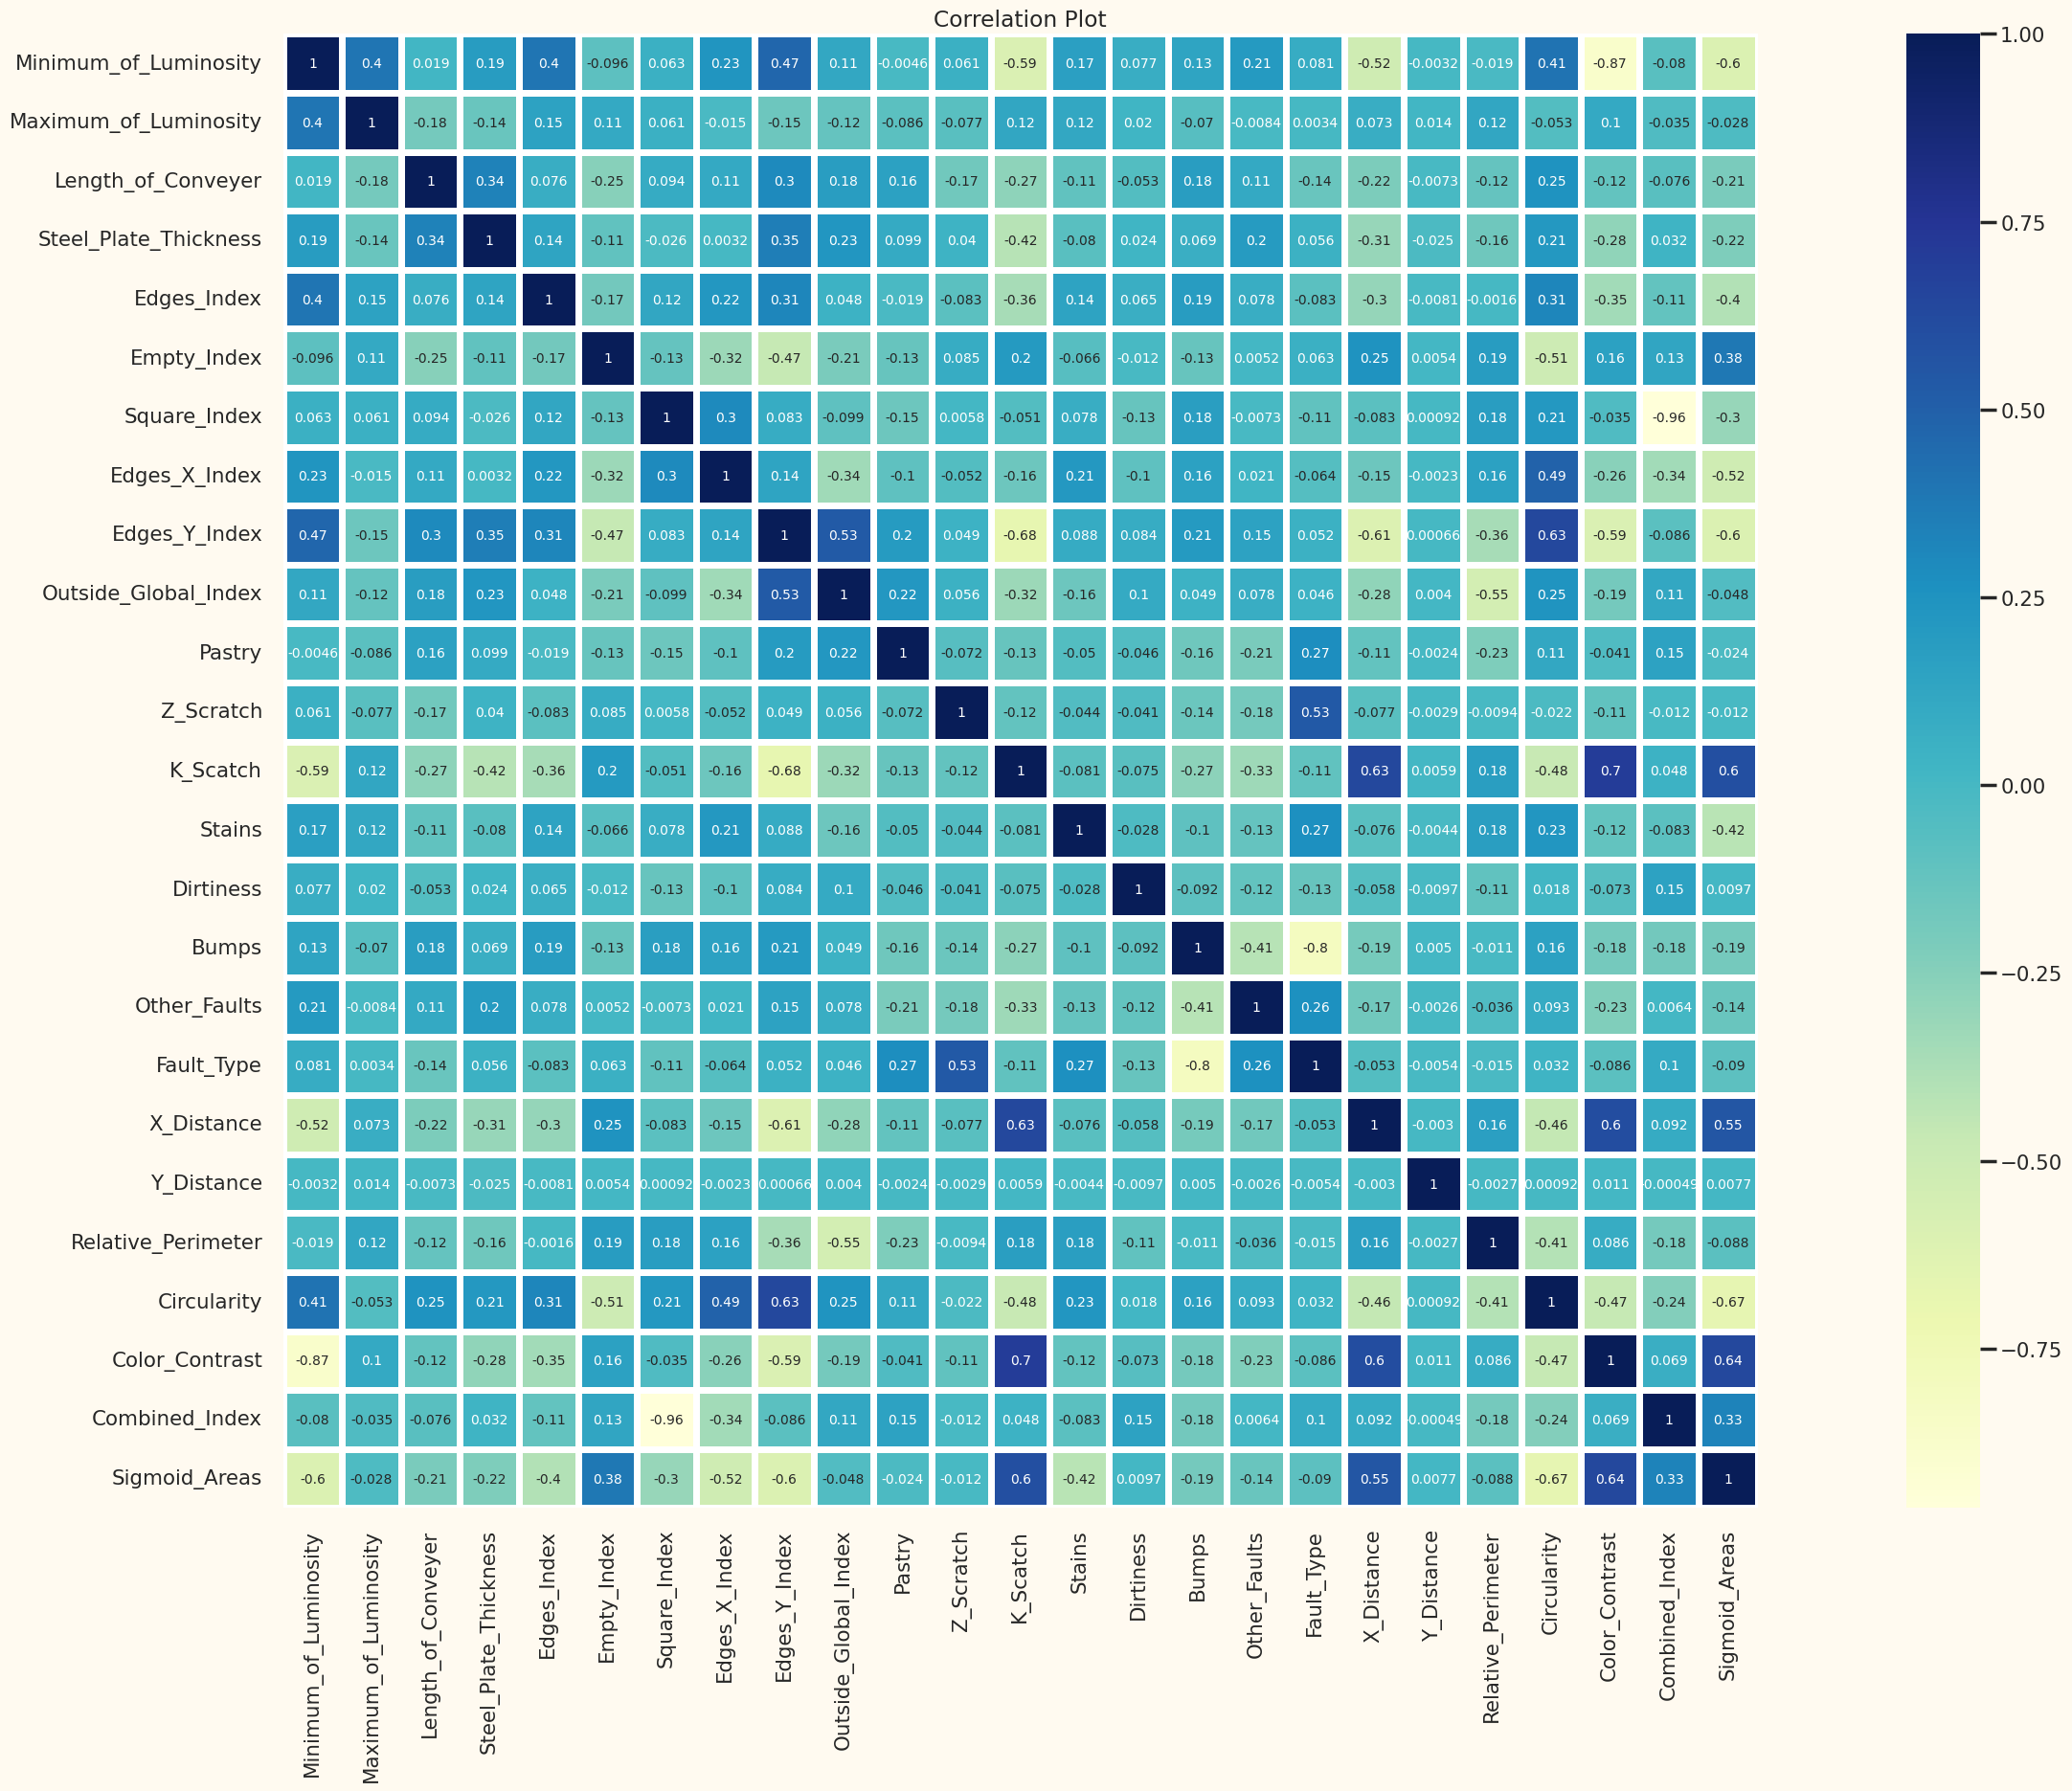

In [37]:

plt.figure(figsize=(40,20))
plt.title('Correlation Plot')
sns.heatmap(
	train_df.corr(),
	linewidths=5,
	annot=True,
	square=True,
	annot_kws={'size':10,},
	cmap='YlGnBu'
)
plt.show()

In [38]:

# Calculate the correlation matrix
correlation_matrix = train_df.corr()
# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75
# Identify and list the highly correlated features
highly_correlated_features = []
for feature in high_correlation_mask.columns:
	correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
	for correlated_feature in correlated_with:
		if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
			highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
	print(f'{feature1} and {feature2}')
# Highly correlated features:

print('3' * 100)
print(train_df.cov()['Fault_Type'])
y = train_df['Fault_Type']
y1 = train_df['Pastry']
y2 = train_df['Z_Scratch']
y3 = train_df['K_Scatch']
y4 = train_df['Stains']
y5 = train_df['Dirtiness']
y6 = train_df['Bumps']
y7 = train_df['Other_Faults']
x = train_df.drop(['Pastry', 'Z_Scratch', \
				   'K_Scatch', 'Stains', \
				   'Dirtiness', 'Bumps', \
				   'Other_Faults', 'Fault_Type'], axis=1)


Highly correlated features:
3333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333
Minimum_of_Luminosity     3.968449
Maximum_of_Luminosity     0.082743
Length_of_Conveyer      -34.169699
Steel_Plate_Thickness     0.050376
Edges_Index              -0.045392
Empty_Index               0.013382
Square_Index             -0.047021
Edges_X_Index            -0.024433
Edges_Y_Index             0.019554
Outside_Global_Index      0.037631
Pastry                    0.123174
Z_Scratch                 0.216303
K_Scatch                 -0.068703
Stains                    0.077279
Dirtiness                -0.034960
Bumps                    -0.590965
Other_Faults              0.208827
Fault_Type                2.906852
X_Distance               -7.287125
Y_Distance               -0.002870
Relative_Perimeter       -0.000972
Circularity               0.011363
Color_Contrast           -3.885707
Combined_Index            0.039883
Sigmoid_Areas            -0.007

In [39]:

# Computing Class Weights¶
from sklearn.utils.class_weight import compute_class_weight
# Convert y to a NumPy array if it's not already one
arr = np.array(y)

# Calculate unique classes in y
unique_classes = np.unique(arr)

# Convert unique_classes to a list to ensure hashability
unique_classes_list = list(unique_classes)

# Calculate class weights based on the training data
class_weights = compute_class_weight('balanced', 
                                     classes=unique_classes_list,
                                     y=y)

# Create a dictionary of class weights
class_weights_dict = dict(zip(unique_classes_list, class_weights))
print(class_weights_dict)
class_weights_dict = {0: 0.5766795691181325, \
					  1: 5.660972017673049, \
					  2: 0.8002248407378107, \
					  3: 0.4198121450415028, \
					  4: 1.2020890668001, \
					  5: 4.833752515090543, \
					  6: 2.3874534161490684}

print(x.shape)
print('4' * 100)
print(test_df.shape)
print('5' * 100)

{0: 0.5766795691181325, 1: 5.660972017673049, 2: 0.8002248407378107, 3: 0.4198121450415028, 4: 1.2020890668001, 5: 4.833752515090543, 6: 2.3874534161490684}
(19219, 17)
4444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444
(12814, 17)
5555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555


In [40]:

print(x.shape)
print('4' * 100)
print(test_df.shape)
print('5' * 100)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = RobustScaler()
standardscl = StandardScaler()
minmax = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
test_df_scaled = scaler.transform(test_df)


(19219, 17)
4444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444
(12814, 17)
5555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555555


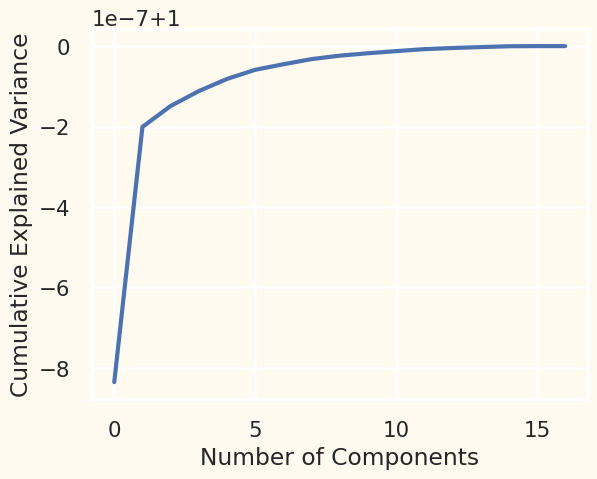

In [41]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
	train_test_split(x, y, test_size=0.2, random_state=42)
x_train_scaled, x_test_scaled, y_train, y_test = \
	train_test_split(x_scaled, y, test_size=0.2, random_state=42)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(x_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()
# PCA- Transformation
# pca=PCA(n_components=20)
# pca


In [42]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
	train_test_split(x, y, test_size=0.2, random_state=42)
x_train_scaled, x_test_scaled, y_train, y_test = \
	train_test_split(x_scaled, y, test_size=0.2, random_state=42)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(x_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()
# Scaled Data
x_scaled=pca.fit_transform(x_scaled)
x_train1 = pca.transform(x_train)
# Scaled data
test_df_scaled=pca.transform(test_df_scaled)
x_test1 = pca.transform(x_test)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = RobustScaler()
standardscl = StandardScaler()
minmax = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
test_df_scaled = scaler.transform(test_df)



# plt.plot(cumulative_variance_ratio)
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.show()
## PCA- Transformation
# pca=PCA(n_components=20)
# pca


In [43]:

# Machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, \
	AdaBoostClassifier, GradientBoostingClassifier, \
	VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
import os
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.multiclass import OneVsRestClassifier
# from scikeras.wrappers import KerasClassifier

# for hypertuning

import optuna
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score  # for Gini-mean
from sklearn.metrics import roc_curve, auc


def model_prediction(model, x, y, n_splits=5, random_state=42):
	skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
	training_score = []
	testing_score = []
	precision = []
	recall = []
	f1_score_ = []
	roc_auc_scores = []
	x = pd.DataFrame(x)
	for train_index, test_index in skf.split(x, y):
		x_train, x_test = x.iloc[train_index], x.iloc[test_index]
		y_train, y_test = y.iloc[train_index], y.iloc[test_index]
		model.fit(x_train, y_train)
		x_train_pred = model.predict(x_train)
		y_test_pred = model.predict(x_test)
		a = accuracy_score(y_train, x_train_pred) * 100
		b = accuracy_score(y_test, y_test_pred) * 100
		c = precision_score(y_test, y_test_pred, average='weighted')
		d = recall_score(y_test, y_test_pred, average='weighted')
		e = f1_score(y_test, y_test_pred, average='weighted')
		# Calculate AUC-ROC score
		roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
		roc_auc_scores.append(roc_auc)

		training_score.append(a)
		testing_score.append(b)
		precision.append(c)
		recall.append(d)
		f1_score_.append(e)

	print("\n------------------------------------------------------------------------")
	print(f"Mean Accuracy_Score of {model} model on Training Data is:", np.mean(training_score))
	print(f"Mean Accuracy_Score of {model} model on Testing Data is:", np.mean(testing_score))
	print(f"Mean Precision Score of {model} model is:", np.mean(precision))
	print(f"Mean Recall Score of {model} model is:", np.mean(recall))
	print(f"Mean f1 Score of {model} model is:", np.mean(f1_score_))
	print(f"Mean AUC-ROC Score of {model} model is:", np.mean(roc_auc_scores))

	print("\n------------------------------------------------------------------------")
	print(f"Classification Report of {model} model is:")
	y_pred_all = cross_val_predict(model, x, y, cv=skf)
	print(classification_report(y, y_pred_all))

	print("\n------------------------------------------------------------------------")
	print(f"Plotting ROC-AUC curve for {model} model:")
	mean_fpr = np.linspace(0, 1, 100)
	tprs = []
	for train_index, test_index in skf.split(x, y):
		x_train, x_test = x.iloc[train_index], x.iloc[test_index]
		y_train, y_test = y.iloc[train_index], y.iloc[test_index]
		probas_ = model.fit(x_train, y_train).predict_proba(x_test)
		fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
		tprs.append(np.interp(mean_fpr, fpr, tpr))
	mean_tpr = np.mean(tprs, axis=0)
	mean_tpr[-1] = 1.0
	mean_auc = auc(mean_fpr, mean_tpr)
	plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC={mean_auc:.2f}')
	plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='change', alpha=.8)
	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	plt.title(f'ROC - AUC Curve for {model} Model')
	plt.legend(loc='lower right')
	plt.show()


2024-04-05 15:23:54.702444: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-05 15:23:58.018700: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



------------------------------------------------------------------------
Mean Accuracy_Score of LogisticRegression() model on Training Data is: 92.25245814404033
Mean Accuracy_Score of LogisticRegression() model on Testing Data is: 92.27327386604779
Mean Precision Score of LogisticRegression() model is: 0.8844597930614615
Mean Recall Score of LogisticRegression() model is: 0.9227327386604778
Mean f1 Score of LogisticRegression() model is: 0.8896751858408181
Mean AUC-ROC Score of LogisticRegression() model is: 0.8372648308187596

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     17753
           1       0.39      0.02      0.04      1466

    accuracy                           0.92     19219
   macro avg       0.66      0.51      0.50     19219
weighted avg       0.88      0.92      0.89     19219


-------

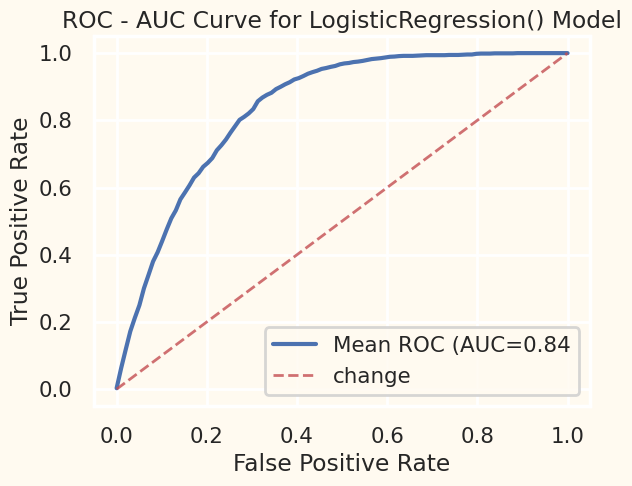

In [44]:
model_prediction(LogisticRegression(), x_scaled, y1, n_splits=5, random_state=42)


------------------------------------------------------------------------
Mean Accuracy_Score of LogisticRegression() model on Training Data is: 93.99942776410073
Mean Accuracy_Score of LogisticRegression() model on Testing Data is: 94.00072648541627
Mean Precision Score of LogisticRegression() model is: 0.8919623871938362
Mean Recall Score of LogisticRegression() model is: 0.9400072648541627
Mean f1 Score of LogisticRegression() model is: 0.9112921123913116
Mean AUC-ROC Score of LogisticRegression() model is: 0.8390099933675366

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18069
           1       0.29      0.00      0.00      1150

    accuracy                           0.94     19219
   macro avg       0.61      0.50      0.49     19219
weighted avg       0.90      0.94      0.91     19219


-------

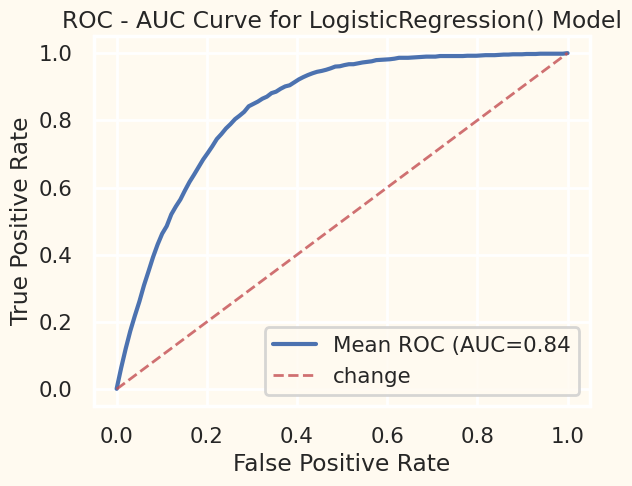

In [45]:
model_prediction(LogisticRegression(), x_scaled, y2, n_splits=5, random_state=42)


------------------------------------------------------------------------
Mean Accuracy_Score of LogisticRegression() model on Training Data is: 95.64103339170748
Mean Accuracy_Score of LogisticRegression() model on Testing Data is: 95.70734172677162
Mean Precision Score of LogisticRegression() model is: 0.9566663973327438
Mean Recall Score of LogisticRegression() model is: 0.9570734172677163
Mean f1 Score of LogisticRegression() model is: 0.9568224348017512
Mean AUC-ROC Score of LogisticRegression() model is: 0.9706502301085631

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     15787
           1       0.89      0.87      0.88      3432

    accuracy                           0.96     19219
   macro avg       0.93      0.92      0.93     19219
weighted avg       0.96      0.96      0.96     19219


-------

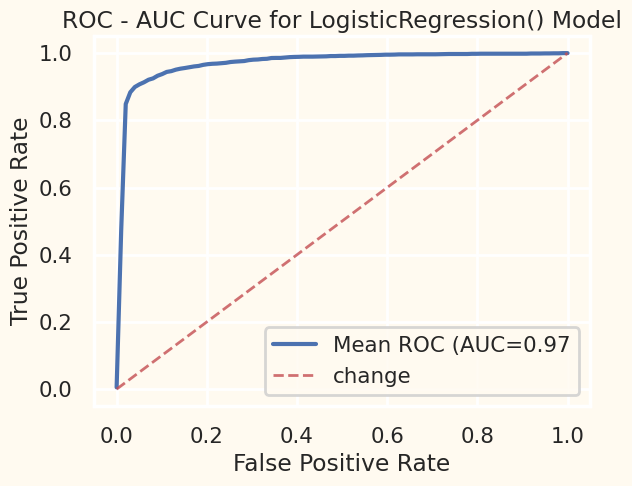

In [46]:
model_prediction(LogisticRegression(), x_scaled, y3, n_splits=5, random_state=42)


------------------------------------------------------------------------
Mean Accuracy_Score of LogisticRegression() model on Training Data is: 97.63514606228269
Mean Accuracy_Score of LogisticRegression() model on Testing Data is: 97.65858191021529
Mean Precision Score of LogisticRegression() model is: 0.9763828379492361
Mean Recall Score of LogisticRegression() model is: 0.9765858191021529
Mean f1 Score of LogisticRegression() model is: 0.9763327218010879
Mean AUC-ROC Score of LogisticRegression() model is: 0.9743492247827372

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18651
           1       0.61      0.58      0.59       568

    accuracy                           0.98     19219
   macro avg       0.80      0.78      0.79     19219
weighted avg       0.98      0.98      0.98     19219


-------

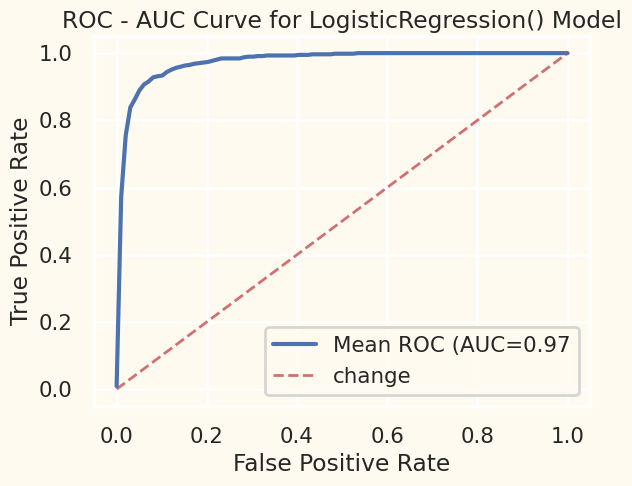

In [47]:
model_prediction(LogisticRegression(), x_scaled, y4, n_splits=5, random_state=42)


------------------------------------------------------------------------
Mean Accuracy_Score of LogisticRegression() model on Training Data is: 97.47255315008925
Mean Accuracy_Score of LogisticRegression() model on Testing Data is: 97.47645556348922
Mean Precision Score of LogisticRegression() model is: 0.9501659389289874
Mean Recall Score of LogisticRegression() model is: 0.9747645556348921
Mean f1 Score of LogisticRegression() model is: 0.9623080748665522
Mean AUC-ROC Score of LogisticRegression() model is: 0.8213956640586897

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18734
           1       0.00      0.00      0.00       485

    accuracy                           0.97     19219
   macro avg       0.49      0.50      0.49     19219
weighted avg       0.95      0.97      0.96     19219


-------

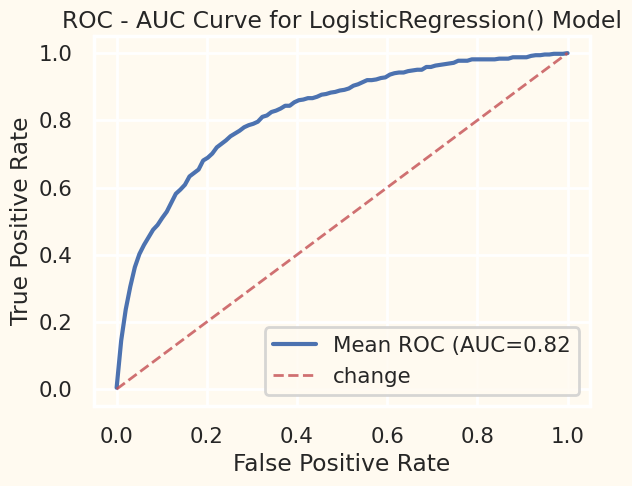

In [48]:
model_prediction(LogisticRegression(), x_scaled, y5, n_splits=5, random_state=42)


------------------------------------------------------------------------
Mean Accuracy_Score of LogisticRegression() model on Training Data is: 75.38633063458626
Mean Accuracy_Score of LogisticRegression() model on Testing Data is: 75.48257396247024
Mean Precision Score of LogisticRegression() model is: 0.6973826111047645
Mean Recall Score of LogisticRegression() model is: 0.7548257396247025
Mean f1 Score of LogisticRegression() model is: 0.6797416178549149
Mean AUC-ROC Score of LogisticRegression() model is: 0.7193268914543541

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.76      0.97      0.86     14456
           1       0.53      0.09      0.15      4763

    accuracy                           0.75     19219
   macro avg       0.65      0.53      0.50     19219
weighted avg       0.71      0.75      0.68     19219


-------

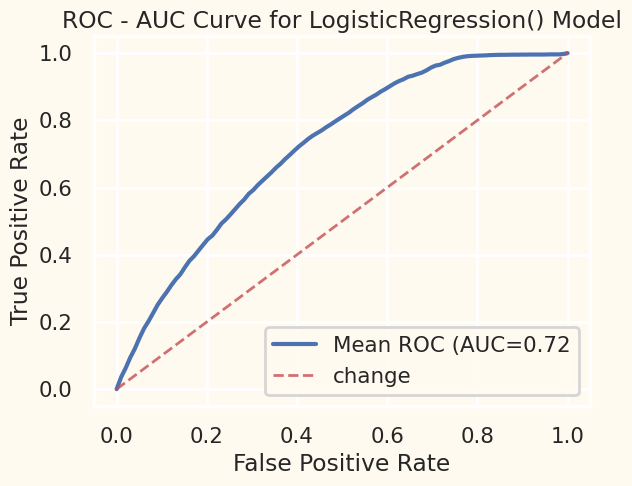

In [49]:
model_prediction(LogisticRegression(), x_scaled, y6, n_splits=5, random_state=42)


------------------------------------------------------------------------
Mean Accuracy_Score of LogisticRegression() model on Training Data is: 67.10676717172998
Mean Accuracy_Score of LogisticRegression() model on Testing Data is: 66.97535933679978
Mean Precision Score of LogisticRegression() model is: 0.638956260872553
Mean Recall Score of LogisticRegression() model is: 0.6697535933679978
Mean f1 Score of LogisticRegression() model is: 0.6081982737677502
Mean AUC-ROC Score of LogisticRegression() model is: 0.6534624242586254

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.68      0.93      0.79     12661
           1       0.55      0.17      0.26      6558

    accuracy                           0.67     19219
   macro avg       0.62      0.55      0.52     19219
weighted avg       0.64      0.67      0.61     19219


--------

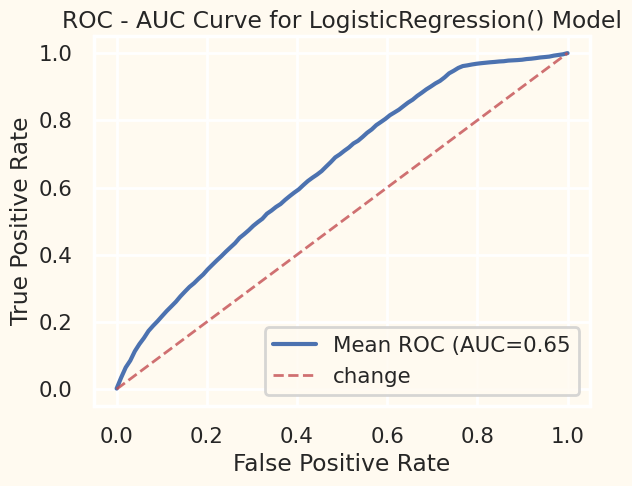

In [50]:
model_prediction(LogisticRegression(), x_scaled, y7, n_splits=5, random_state=42)

In [51]:

def objective(trial):
	max_depth = trial.suggest_int('max_depth', 3, 10)
	n_estimators = trial.suggest_int('n_estimators', 100, 2000)
	gamma = trial.suggest_float('gamma', 0, 1)
	reg_alpha = trial.suggest_float('reg_alpha', 0, 2)
	reg_lambda = trial.suggest_float('reg_lambda', 0, 2)
	min_child_weight = trial.suggest_int('min_child_weight', 0, 10)
	subsample = trial.suggest_float('subsample', 0, 1)
	colsample_bytree = trial.suggest_float('colsample_bytree', 0, 1)
	learning_rate = trial.suggest_float('learning_rate', 0.01, 1)

	print('Training the model with', x.shape[1], 'features')

	params = {'n_estimators': n_estimators,
			  'learning_rate': learning_rate,
			  'gamma': gamma,
			  'reg_alpha': reg_alpha,
			  'reg_lambda': reg_lambda,
			  'max_depth': max_depth,
			  'min_child_weight': min_child_weight,
			  'subsample': subsample,
			  'colsample_bytree': colsample_bytree,
			  'eval_metric': 'logloss'}  # Using logloss for binary classification

	clf = XGBClassifier(**params,
						booster='gbtree',
						objective='binary:logistic',  # Binary classification objective
						verbosity=0)

	cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
	cv_results = cross_val_score(clf, x, y7, cv=cv, scoring='roc_auc')  # Using roc_auc scoring

	validation_score = np.mean(cv_results)
	return validation_score


In [52]:

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25, n_jobs=16)
best_params = study.best_params
print("Best Hyperparameters y7:", best_params)

[I 2024-04-05 15:27:35,119] A new study created in memory with name: no-name-a96cf231-40a9-447c-a51e-fd7e463880c8


Training the model with 17 features
Training the model with 17 features
Training the model with 17 features
Training the model with 17 features
Training the model with 17 features
Training the model with 17 features
Training the model with 17 features
Training the model with 17 features
Training the model with 17 features
Training the model with 17 features
Training the model with 17 features
Training the model with 17 features
Training the model with 17 features
Training the model with 17 features
Training the model with 17 features
Training the model with 17 features


[I 2024-04-05 15:28:29,390] Trial 8 finished with value: 0.6618739438462662 and parameters: {'max_depth': 6, 'n_estimators': 123, 'gamma': 0.9341953394979878, 'reg_alpha': 1.1654510220718826, 'reg_lambda': 0.8804903141899525, 'min_child_weight': 10, 'subsample': 0.09074514768465336, 'colsample_bytree': 0.9462586919814505, 'learning_rate': 0.1901321251991083}. Best is trial 8 with value: 0.6618739438462662.


Training the model with 17 features


[I 2024-04-05 15:29:01,830] Trial 9 finished with value: 0.6306857299106159 and parameters: {'max_depth': 8, 'n_estimators': 154, 'gamma': 0.40162404391137885, 'reg_alpha': 1.825255954467492, 'reg_lambda': 1.4585922603658608, 'min_child_weight': 8, 'subsample': 0.6426695437963434, 'colsample_bytree': 0.865013618443218, 'learning_rate': 0.6965031969364395}. Best is trial 8 with value: 0.6618739438462662.


Training the model with 17 features


[I 2024-04-05 15:30:00,971] Trial 11 finished with value: 0.6468001978825335 and parameters: {'max_depth': 5, 'n_estimators': 1093, 'gamma': 0.8211453550341505, 'reg_alpha': 1.8089647877689965, 'reg_lambda': 1.2452054017559766, 'min_child_weight': 1, 'subsample': 0.9688775890356522, 'colsample_bytree': 0.3964704977876957, 'learning_rate': 0.881843709146291}. Best is trial 8 with value: 0.6618739438462662.


Training the model with 17 features


[I 2024-04-05 15:30:07,919] Trial 6 finished with value: 0.6183699740980282 and parameters: {'max_depth': 8, 'n_estimators': 425, 'gamma': 0.8006642146310756, 'reg_alpha': 0.8454233536839264, 'reg_lambda': 1.1556520140771565, 'min_child_weight': 2, 'subsample': 0.6213116158883957, 'colsample_bytree': 0.5332836191370899, 'learning_rate': 0.8882559946870356}. Best is trial 8 with value: 0.6618739438462662.


Training the model with 17 features


[I 2024-04-05 15:31:02,913] Trial 2 finished with value: 0.6646225928728164 and parameters: {'max_depth': 10, 'n_estimators': 566, 'gamma': 0.11916763405381026, 'reg_alpha': 1.7026702985758038, 'reg_lambda': 0.04939639686977926, 'min_child_weight': 3, 'subsample': 0.9289161150482391, 'colsample_bytree': 0.5769649394001406, 'learning_rate': 0.2524748785766475}. Best is trial 2 with value: 0.6646225928728164.


Training the model with 17 features


[I 2024-04-05 15:31:04,424] Trial 7 finished with value: 0.6758955456799705 and parameters: {'max_depth': 8, 'n_estimators': 1362, 'gamma': 0.9957257501543014, 'reg_alpha': 1.0802578328033963, 'reg_lambda': 1.8668264410562883, 'min_child_weight': 1, 'subsample': 0.8563920017958476, 'colsample_bytree': 0.0068509957296827295, 'learning_rate': 0.5698512883254185}. Best is trial 7 with value: 0.6758955456799705.


Training the model with 17 features


[I 2024-04-05 15:31:15,965] Trial 19 finished with value: 0.5955193988434344 and parameters: {'max_depth': 7, 'n_estimators': 140, 'gamma': 0.39308940878456733, 'reg_alpha': 1.5302265417657523, 'reg_lambda': 0.7417280859625057, 'min_child_weight': 7, 'subsample': 0.21139846009751428, 'colsample_bytree': 0.8255043896652747, 'learning_rate': 0.5977709536807411}. Best is trial 7 with value: 0.6758955456799705.


Training the model with 17 features


[I 2024-04-05 15:31:36,486] Trial 18 finished with value: 0.6557744533395942 and parameters: {'max_depth': 4, 'n_estimators': 322, 'gamma': 0.16121569389863033, 'reg_alpha': 0.9763683526558371, 'reg_lambda': 1.6552391508259245, 'min_child_weight': 6, 'subsample': 0.40367670881780193, 'colsample_bytree': 0.5533127672663156, 'learning_rate': 0.36481966682517214}. Best is trial 7 with value: 0.6758955456799705.


Training the model with 17 features


[I 2024-04-05 15:31:39,895] Trial 16 finished with value: 0.6181507142260871 and parameters: {'max_depth': 4, 'n_estimators': 632, 'gamma': 0.8138831063330474, 'reg_alpha': 1.7868713053349623, 'reg_lambda': 0.9862873623053943, 'min_child_weight': 5, 'subsample': 0.4323791371235567, 'colsample_bytree': 0.31870634636358, 'learning_rate': 0.7785018282916119}. Best is trial 7 with value: 0.6758955456799705.


Training the model with 17 features


[I 2024-04-05 15:31:41,751] Trial 14 finished with value: 0.6482024256952131 and parameters: {'max_depth': 8, 'n_estimators': 1821, 'gamma': 0.8033590067814014, 'reg_alpha': 1.047318110385498, 'reg_lambda': 1.8745717236180983, 'min_child_weight': 1, 'subsample': 0.9387543511423565, 'colsample_bytree': 0.1544005706058228, 'learning_rate': 0.8622134682958235}. Best is trial 7 with value: 0.6758955456799705.
[I 2024-04-05 15:32:09,476] Trial 24 finished with value: 0.6005268681525082 and parameters: {'max_depth': 4, 'n_estimators': 100, 'gamma': 0.35575528054919525, 'reg_alpha': 1.5946677793929815, 'reg_lambda': 0.7525741644488535, 'min_child_weight': 4, 'subsample': 0.06268874809514857, 'colsample_bytree': 0.22227577425104206, 'learning_rate': 0.752995070166516}. Best is trial 7 with value: 0.6758955456799705.
[I 2024-04-05 15:32:51,409] Trial 12 finished with value: 0.6383127474516803 and parameters: {'max_depth': 10, 'n_estimators': 1086, 'gamma': 0.18784173183886554, 'reg_alpha': 1.54

Best Hyperparameters y7: {'max_depth': 6, 'n_estimators': 224, 'gamma': 0.593297294542717, 'reg_alpha': 0.6351849259890319, 'reg_lambda': 1.5460673655905797, 'min_child_weight': 10, 'subsample': 0.4346593559150914, 'colsample_bytree': 0.4446602439574777, 'learning_rate': 0.03674581727762911}


In [53]:

# Machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, \
	AdaBoostClassifier, GradientBoostingClassifier, \
	VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
import os
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.multiclass import OneVsRestClassifier
# from scikeras.wrappers import KerasClassifier

# for hypertuning

import optuna
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score  # for Gini-mean
from sklearn.metrics import roc_curve, auc


In [54]:
xgb_best_params_for_y1 = {'max_depth': 5, \
						  'n_estimators': 1627, \
						  'gamma': 0.8952807768735265,
						  'reg_alpha': 1.6314226873472901, \
						  'reg_lambda': 1.7229132141868826, \
						  'min_child_weight': 9,
						  'subsample': 0.9885054042421748, \
						  'colsample_bytree': 0.22439719563481197, \
						  'learning_rate': 0.10650804734533341}
xgb_model_for_y1 = XGBClassifier(**xgb_best_params_for_y1)
result = xgb_model_for_y1.fit(x, y1)
print('7' * 100)
print(result)

7777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.22439719563481197, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.8952807768735265,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.10650804734533341,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1627, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


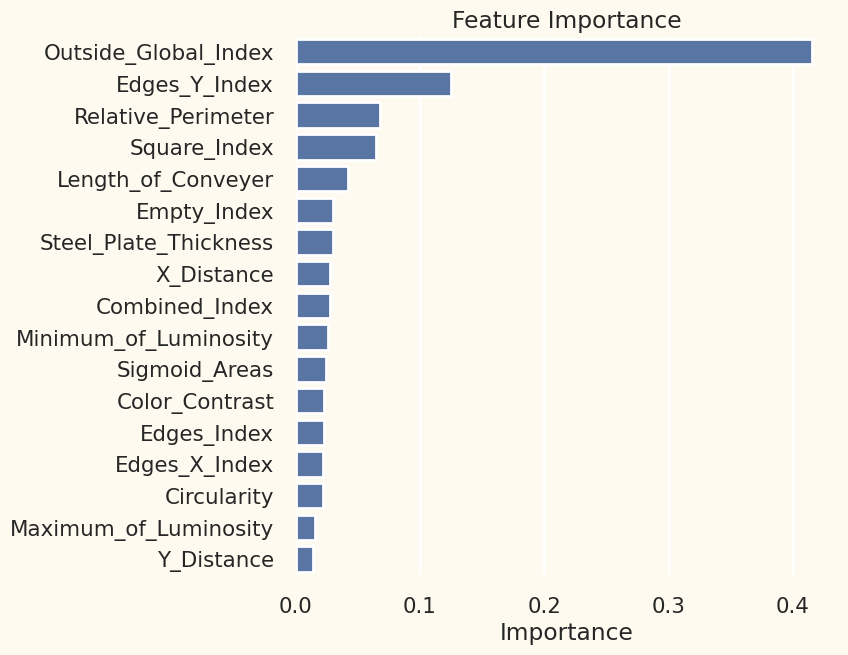

In [55]:

feature_importance = xgb_model_for_y1.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [56]:

xgb_best_params_for_y2 = {'max_depth': 4, 'n_estimators': 623, \
						  'gamma': 0.8519204218831254, \
						  'reg_alpha': 1.2439917683504533, \
						  'reg_lambda': 1.4590567435160746, \
						  'min_child_weight': 8, \
						  'subsample': 0.40710690255500565, \
						  'colsample_bytree': 0.2267807727315173, \
						  'learning_rate': 0.04570427430948454}
xgb_model_for_y2 = XGBClassifier(**xgb_best_params_for_y2)
xgb_model_for_y2.fit( x, y2)

# feature importance
feature_importance = xgb_model_for_y2.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

NotFittedError: need to call fit or load_model beforehand

In [ ]:

xgb_best_params_for_y3 = {'max_depth': 5, 'n_estimators': 1680, 'gamma': 0.6923689614425462,
						  'reg_alpha': 0.9189470702166882, 'reg_lambda': 1.5117758160539976, 'min_child_weight': 9,
						  'subsample': 0.6940678483755448, 'colsample_bytree': 0.8761358304654752,
						  'learning_rate': 0.011025136150862678}
xgb_model_for_y3 = XGBClassifier(**xgb_best_params_for_y3)
xgb_model_for_y3.fit(x, y3)
# feature importances
feature_importance = xgb_model_for_y3.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()


In [ ]:

xgb_best_params_for_y4 = {'max_depth': 6, 'n_estimators': 401, 'gamma': 0.3226754521662682,
						  'reg_alpha': 0.35015352024357355, 'reg_lambda': 1.455091751574945, 'min_child_weight': 2,
						  'subsample': 0.6613340923578201, 'colsample_bytree': 0.6369472068920922,
						  'learning_rate': 0.02173505504016533}
xgb_model_for_y4 = XGBClassifier(**xgb_best_params_for_y4)
xgb_model_for_y4.fit(x, y4)

# feature importances
feature_importance = xgb_model_for_y4.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

xgb_best_params_for_y5 = {'max_depth': 8, 'n_estimators': 1586, 'gamma': 0.32950059377825075,
						  'reg_alpha': 1.9609119815708795, 'reg_lambda': 1.528942899424126, 'min_child_weight': 0,
						  'subsample': 0.2571147836064856, 'colsample_bytree': 0.24989821475746465,
						  'learning_rate': 0.01350991516826753}
xgb_model_for_y5 = XGBClassifier(**xgb_best_params_for_y5)
xgb_model_for_y5.fit(x, y5)
# feature importances
feature_importance = xgb_model_for_y5.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

xgb_best_params_for_y6 = {'max_depth': 3, 'n_estimators': 1965, 'gamma': 0.7461420398485773,
						  'reg_alpha': 0.6331839468092292, 'reg_lambda': 1.7474555338548388, 'min_child_weight': 3,
						  'subsample': 0.44572949961178254, 'colsample_bytree': 0.44437417147066066,
						  'learning_rate': 0.013061101850914858}
xgb_model_for_y6 = XGBClassifier(**xgb_best_params_for_y6)
xgb_model_for_y6.fit(x, y6)
# feature importances
feature_importance = xgb_model_for_y6.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

xgb_best_params_for_y7 = {'max_depth': 4, 'n_estimators': 663, 'gamma': 0.6429564571848232,
						  'reg_alpha': 0.3267006339507057, 'reg_lambda': 0.04658361960102192, 'min_child_weight': 6,
						  'subsample': 0.9939674566310442, 'colsample_bytree': 0.1435958193323451,
						  'learning_rate': 0.24960789830790053}
xgb_model_for_y7 = XGBClassifier(**xgb_best_params_for_y7)
xgb_model_for_y7.fit(x, y7)

# feature importances
feature_importance = xgb_model_for_y7.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

model_prediction(XGBClassifier(**xgb_best_params_for_y1), x, y1, n_splits=5, random_state=42)



In [ ]:
model_prediction(XGBClassifier(**xgb_best_params_for_y2), x, y2, n_splits=5, random_state=42)


In [ ]:
model_prediction(XGBClassifier(**xgb_best_params_for_y3), x, y3, n_splits=5, random_state=42)


In [ ]:
model_prediction(XGBClassifier(**xgb_best_params_for_y4), x, y4, n_splits=5, random_state=42)


In [ ]:
model_prediction(XGBClassifier(**xgb_best_params_for_y5), x, y5, n_splits=5, random_state=42)


In [ ]:
model_prediction(XGBClassifier(**xgb_best_params_for_y6), x, y6, n_splits=5, random_state=42)

In [ ]:

model_prediction(XGBClassifier(**xgb_best_params_for_y7), x, y7, n_splits=5, random_state=42)

In [ ]:

def objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
    iterations = trial.suggest_int('iterations', 100, 5000)
    depth = trial.suggest_int('depth', 3, 10)
    colsample_bylevel = trial.suggest_float('colsample_bylevel', 0.5, 1.0)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 0.0, 2.0)
    border_count = trial.suggest_int('border_count', 32, 255)

    print('Training the model with', x.shape[1], 'features')

    params = {
        'learning_rate': learning_rate,
        'iterations': iterations,
        'depth': depth,
        'colsample_bylevel': colsample_bylevel,
        'l2_leaf_reg': l2_leaf_reg,
        'border_count': border_count,
    }

    clf = CatBoostClassifier(**params, eval_metric='AUC', task_type="CPU", verbose=300, early_stopping_rounds=50)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_validate(clf, x, y7, cv=cv, scoring='roc_auc')

    validation_score = np.mean(cv_results['test_score'])

    return validation_score

In [ ]:
# Set up Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters for y7:", best_params)

In [ ]:
catboost_best_params_for_y1 = {'learning_rate': 0.0293790855184329, 'iterations': 1481, 'depth': 3,
							   'colsample_bylevel': 0.5711312763952309, 'l2_leaf_reg': 1.5994222344635594,
							   'border_count': 208}
cb_model_for_y1 = CatBoostClassifier(**catboost_best_params_for_y1)
cb_model_for_y1.fit(x, y1)
# feature importances
feature_importance = cb_model_for_y1.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

catboost_best_params_for_y2 = {'learning_rate': 0.03857054239913968, 'iterations': 206, 'depth': 10,
							   'colsample_bylevel': 0.5393784309306074, 'l2_leaf_reg': 1.3906029897172827,
							   'border_count': 231}
cb_model_for_y2 = CatBoostClassifier(**catboost_best_params_for_y2)
cb_model_for_y2.fit(x, y2)

feature_importance=cb_model_for_y2.feature_importances_
feature_importance_df=pd.DataFrame({'Feature':x.columns,
									'Importance':feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()


In [ ]:


catboost_best_params_for_y3 = {'learning_rate': 0.05819735650442166, 'iterations': 165, 'depth': 6,
							   'colsample_bylevel': 0.960964834849099, 'l2_leaf_reg': 0.6700019633321236,
							   'border_count': 189}

cb_model_for_y3 = CatBoostClassifier(**catboost_best_params_for_y3)
cb_model_for_y3.fit(x, y3)

# feature importances
feature_importance = cb_model_for_y3.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

catboost_best_params_for_y4 = {'learning_rate': 0.032940739491683975, 'iterations': 407, 'depth': 8,
							   'colsample_bylevel': 0.6333926050478358, 'l2_leaf_reg': 1.1045970003458674,
							   'border_count': 130}

cb_model_for_y4 = CatBoostClassifier(**catboost_best_params_for_y4)
cb_model_for_y4.fit(x, y4)
# feature importances
feature_importance = cb_model_for_y4.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()


In [ ]:

catboost_best_params_for_y5 = {'learning_rate': 0.07936470052548467, 'iterations': 135, 'depth': 8,
							   'colsample_bylevel': 0.8032026164713476, 'l2_leaf_reg': 0.7783270167485883,
							   'border_count': 247}
cb_model_for_y5 = CatBoostClassifier(**catboost_best_params_for_y5)
cb_model_for_y5.fit(x, y5)
# feature importances
feature_importance = cb_model_for_y5.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

catboost_best_params_for_y6 = {'learning_rate': 0.010315180165549727, 'iterations': 1156, 'depth': 9,
							   'colsample_bylevel': 0.6160311869329463, 'l2_leaf_reg': 1.1668408958633865,
							   'border_count': 179}
cb_model_for_y6 = CatBoostClassifier(**catboost_best_params_for_y6)
cb_model_for_y6.fit(x, y6)

# feature importances
feature_importance = cb_model_for_y6.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

catboost_best_params_for_y7 = {'learning_rate': 0.025827131598767934, 'iterations': 848, 'depth': 3,
							   'colsample_bylevel': 0.74491431963177, 'l2_leaf_reg': 0.12688953370416511,
							   'border_count': 189}
cb_model_for_y7 = CatBoostClassifier(**catboost_best_params_for_y7)
cb_model_for_y7.fit(x, y7)
# feature importances
feature_importance = cb_model_for_y7.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': 0.0,
        'lambda_l2': 0.0,
        'num_leaves': trial.suggest_int('num_leaves', 10, 200),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1)
    }

    print('Training the model with', x.shape[1], 'features')

    lgb_classifier = LGBMClassifier(**params)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(lgb_classifier, x, y7, cv=cv, scoring='roc_auc')

    validation_score = np.mean(cv_results)

    return validation_score

# Set up Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters for y7:", best_params)

In [ ]:

catboost_best_params_for_y1 = {'learning_rate': 0.0293790855184329, 'iterations': 1481, 'depth': 3,
							   'colsample_bylevel': 0.5711312763952309, 'l2_leaf_reg': 1.5994222344635594,
							   'border_count': 208}
cb_model_for_y1 = CatBoostClassifier(**catboost_best_params_for_y1)
cb_model_for_y1.fit(x, y1)
# feature importances
feature_importance = cb_model_for_y1.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

catboost_best_params_for_y2 = {'learning_rate': 0.03857054239913968, 'iterations': 206, 'depth': 10,
							   'colsample_bylevel': 0.5393784309306074, 'l2_leaf_reg': 1.3906029897172827,
							   'border_count': 231}
cb_model_for_y2 = CatBoostClassifier(**catboost_best_params_for_y2)
cb_model_for_y2.fit(x, y2)

feature_importance=cb_model_for_y2.feature_importances_
feature_importance_df=pd.DataFrame({'Feature':x.columns,
									'Importance':feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

catboost_best_params_for_y3 = {'learning_rate': 0.05819735650442166, 'iterations': 165, 'depth': 6,
							   'colsample_bylevel': 0.960964834849099, 'l2_leaf_reg': 0.6700019633321236,
							   'border_count': 189}

cb_model_for_y3 = CatBoostClassifier(**catboost_best_params_for_y3)
cb_model_for_y3.fit(x, y3)

# feature importances
feature_importance = cb_model_for_y3.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

catboost_best_params_for_y4 = {'learning_rate': 0.032940739491683975, 'iterations': 407, 'depth': 8,
							   'colsample_bylevel': 0.6333926050478358, 'l2_leaf_reg': 1.1045970003458674,
							   'border_count': 130}

cb_model_for_y4 = CatBoostClassifier(**catboost_best_params_for_y4)
cb_model_for_y4.fit(x, y4)
# feature importances
feature_importance = cb_model_for_y4.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()


In [ ]:

catboost_best_params_for_y5 = {'learning_rate': 0.07936470052548467, 'iterations': 135, 'depth': 8,
							   'colsample_bylevel': 0.8032026164713476, 'l2_leaf_reg': 0.7783270167485883,
							   'border_count': 247}
cb_model_for_y5 = CatBoostClassifier(**catboost_best_params_for_y5)
cb_model_for_y5.fit(x, y5)
# feature importances
feature_importance = cb_model_for_y5.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

catboost_best_params_for_y6 = {'learning_rate': 0.010315180165549727, 'iterations': 1156, 'depth': 9,
							   'colsample_bylevel': 0.6160311869329463, 'l2_leaf_reg': 1.1668408958633865,
							   'border_count': 179}
cb_model_for_y6 = CatBoostClassifier(**catboost_best_params_for_y6)
cb_model_for_y6.fit(x, y6)

# feature importances
feature_importance = cb_model_for_y6.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

catboost_best_params_for_y7 = {'learning_rate': 0.025827131598767934, 'iterations': 848, 'depth': 3,
							   'colsample_bylevel': 0.74491431963177, 'l2_leaf_reg': 0.12688953370416511,
							   'border_count': 189}
cb_model_for_y7 = CatBoostClassifier(**catboost_best_params_for_y7)
cb_model_for_y7.fit(x, y7)
# feature importances
feature_importance = cb_model_for_y7.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()


In [ ]:
def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': 0.0,
        'lambda_l2': 0.0,
        'num_leaves': trial.suggest_int('num_leaves', 10, 200),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1)
    }

    print('Training the model with', x.shape[1], 'features')

    lgb_classifier = LGBMClassifier(**params)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(lgb_classifier, x, y7, cv=cv, scoring='roc_auc')

    validation_score = np.mean(cv_results)

    return validation_score

# Set up Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters for y7:", best_params)

In [ ]:

lgbm_best_params_for_y1 = {'num_leaves': 10, 'colsample_bytree': 0.4938794627384321,
						   'subsample': 0.8742780567743516,
						   'bagging_freq': 8, 'min_child_samples': 71,
						   'learning_rate': 0.07912118780949727}
lgbm_model_for_y1 = LGBMClassifier(**lgbm_best_params_for_y1)
lgbm_model_for_y1.fit( x, y1)

# feature importances
feature_importance = lgbm_model_for_y1.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

lgbm_best_params_for_y2 = {'num_leaves': 21, 'colsample_bytree': 0.4151347339206033, 'subsample': 0.8370319196132707, 'bagging_freq': 6, 'min_child_samples': 29, 'learning_rate': 0.04847995943398712}

lgbm_model_for_y2 = LGBMClassifier(**lgbm_best_params_for_y2)
lgbm_model_for_y2.fit( x, y2)

# feature importances
feature_importance = lgbm_model_for_y2.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()


In [ ]:
lgbm_best_params_for_y3 = {'num_leaves': 100, 'colsample_bytree': 0.5087492462560602, 'subsample': 0.4411107602895591, 'bagging_freq': 1, 'min_child_samples': 62, 'learning_rate': 0.038454266176433355}
lgbm_model_for_y3 = LGBMClassifier(**lgbm_best_params_for_y3)
lgbm_model_for_y3.fit( x, y3)

# feature importances
feature_importance = lgbm_model_for_y3.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

lgbm_best_params_for_y4 = {'num_leaves': 131, 'colsample_bytree': 0.5697305625366826, 'subsample': 0.8109563189916542, 'bagging_freq': 4, 'min_child_samples': 19, 'learning_rate': 0.05213996016102166}
lgbm_model_for_y4 = LGBMClassifier(**lgbm_best_params_for_y4)
lgbm_model_for_y4.fit( x, y4)
# feature importances
feature_importance = lgbm_model_for_y4.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

lgbm_best_params_for_y5 = {'num_leaves': 91, 'colsample_bytree': 0.1639450170074021, 'subsample': 0.5341894798705625, 'bagging_freq': 4, 'min_child_samples': 47, 'learning_rate': 0.018293880009565062}


lgbm_model_for_y5 = LGBMClassifier(**lgbm_best_params_for_y5)
lgbm_model_for_y5.fit( x, y5)

# feature importances
feature_importance = lgbm_model_for_y5.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

lgbm_best_params_for_y6 =  {'num_leaves': 22, 'colsample_bytree': 0.667438994216906, 'subsample': 0.8090648564857341, 'bagging_freq': 1, 'min_child_samples': 93, 'learning_rate': 0.06318737564630748}
lgbm_model_for_y6 = LGBMClassifier(**lgbm_best_params_for_y6)
lgbm_model_for_y6.fit( x, y6)
# feature importances
feature_importance = lgbm_model_for_y6.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:

lgbm_best_params_for_y7 = {'num_leaves': 16, 'colsample_bytree': 0.5430173377906267, 'subsample': 0.9060940434087468, 'bagging_freq': 2, 'min_child_samples': 46, 'learning_rate': 0.04345358731901847}
lgbm_model_for_y7 = LGBMClassifier(**lgbm_best_params_for_y7)
lgbm_model_for_y7.fit( x, y7)
# feature importances
feature_importance = lgbm_model_for_y7.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()


In [ ]:

ensemble_model_for_y1 = VotingClassifier(
    estimators=[
        ('xgb', xgb_model_for_y1),
        ('catboost',cb_model_for_y1),
        ('LGBM', lgbm_model_for_y1)
    ],
    voting='soft',
    flatten_transform=True,
	n_jobs=16
)

# Use AUC-ROC as the scoring parameter
auc_roc_scores = cross_val_score(ensemble_model_for_y1, x, y1, cv=5, scoring='roc_auc')

print("AUC-ROC scores for each fold:", auc_roc_scores)
print("Average AUC-ROC:", auc_roc_scores.mean())


In [ ]:

ensemble_model_for_y1.fit(x,y1)
Pastry = ensemble_model_for_y1.predict_proba(test_df)
Pastry = Pastry[:,1]
Pastry

ensemble_model_for_y2 = VotingClassifier(
    estimators=[
        ('xgb', xgb_model_for_y2),
        ('catboost',cb_model_for_y2),
        ('LGBM', lgbm_model_for_y2)
    ],
    voting='soft',
    flatten_transform=True,
	n_jobs=16
)

# Use AUC-ROC as the scoring parameter
auc_roc_scores = cross_val_score(ensemble_model_for_y2, x, y2, cv=5, scoring='roc_auc')

print("AUC-ROC scores for each fold:", auc_roc_scores)
print("Average AUC-ROC:", auc_roc_scores.mean())


In [ ]:

ensemble_model_for_y2.fit(x,y2)
Z_Scratch = ensemble_model_for_y2.predict_proba(test_df)
Z_Scratch = Z_Scratch[:,1]

ensemble_model_for_y3 = VotingClassifier(
    estimators=[
        ('xgb', xgb_model_for_y3),
        ('catboost',cb_model_for_y3),
        ('LGBM', lgbm_model_for_y3)
    ],
    voting='soft',
    flatten_transform=True
)

# Use AUC-ROC as the scoring parameter
auc_roc_scores = cross_val_score(ensemble_model_for_y3, x, y3, cv=5, scoring='roc_auc')

print("AUC-ROC scores for each fold:", auc_roc_scores)
print("Average AUC-ROC:", auc_roc_scores.mean())
ensemble_model_for_y3.fit(x,y3)

K_Scatch = ensemble_model_for_y3.predict_proba(test_df)
K_Scatch = K_Scatch[:,1]
K_Scatch

ensemble_model_for_y4 = VotingClassifier(
    estimators=[
        ('xgb', xgb_model_for_y4),
        ('catboost',cb_model_for_y4),
        ('LGBM', lgbm_model_for_y4)
    ],
    voting='soft',
    flatten_transform=True,
	n_jobs=16
)

# Use AUC-ROC as the scoring parameter
auc_roc_scores = cross_val_score(ensemble_model_for_y4, x, y4, cv=5, scoring='roc_auc')

print("AUC-ROC scores for each fold:", auc_roc_scores)
print("Average AUC-ROC:", auc_roc_scores.mean())

In [ ]:

ensemble_model_for_y4.fit(x,y4)
Stains = ensemble_model_for_y4.predict_proba(test_df)
Stains = Stains[:,1]
Stains


In [ ]:

ensemble_model_for_y5 = VotingClassifier(
    estimators=[
        ('xgb', xgb_model_for_y5),
        ('catboost',cb_model_for_y5),
        ('LGBM', lgbm_model_for_y5)
    ],
    voting='soft',
    flatten_transform=True
)

# Use AUC-ROC as the scoring parameter
auc_roc_scores = cross_val_score(ensemble_model_for_y5, x, y5, cv=5, scoring='roc_auc')

print("AUC-ROC scores for each fold:", auc_roc_scores)
print("Average AUC-ROC:", auc_roc_scores.mean())
ensemble_model_for_y5.fit(x,y5)
Dirtiness = ensemble_model_for_y5.predict_proba(test_df)
Dirtiness = Dirtiness[:,1]
Dirtiness

In [57]:
len(Dirtiness)

NameError: name 'Dirtiness' is not defined